# Analiza i Bazy Danych
## TIER protocol and tidy data
## Andrzej Janik gr piątek 11:15

In [401]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [402]:
df = pd.read_csv("../OriginalData/weather.txt", header=None)

#### Poniższy kod dzieli nam wczytane dane z pliku weather.txt na dwie części. Pierwsza to 21 znaków odpowiadająca za ID, rok, miesiąc, dzień i zmienną, która była mierzona. Druga to odpowiadające im wartości. Z drugiej części usuwam znaki literowe oraz nieodpowiednie wartości i wstępnie je grupuje.

In [403]:
ID = []
year = []
month =[]
variable =[]
for i in range(df.shape[0]):
    ID.append(df[0][i][0:11])
    year.append(df[0][i][11:15])
    month.append(df[0][i][15:17])
    variable.append(df[0][i][17:21])


series_1 = pd.Series(ID)
series_2 = pd.Series(year)
series_3 = pd.Series(month)
series_4 = pd.Series(variable)

leftside_data = pd.DataFrame()

leftside_data.insert(0, 'ID', series_1)
leftside_data.insert(1, 'rok', series_2)
leftside_data.insert(2, 'miesiac', series_3)
leftside_data.insert(3, 'variable', series_4)

rightside_data = df[0].map(lambda char: char[21:])
rightside_data = rightside_data.replace({'OS': ' ', 'OI': ' ', 'I': ' ', 'SI': ' ','S': ' ', 'B': ' ', 'D': ' ',}, regex=True)
rightside_data=rightside_data.map(str.lstrip)
rightside_data=rightside_data.str.split(r"\s+", expand=True)
rightside_data=rightside_data.replace("-9999", np.NaN)


#### Łącze ze sobą przy użyciu konkatenacji dwa dataframe'y pogrupowanych danych. Następnie z wynikowego dataframe wybieram dane odpowiadające 5 pierwszym miesiącom z roku 2010

In [404]:
frames = [leftside_data, rightside_data]
result = pd.concat(frames, axis=1, ignore_index=True)
result=result.rename(columns={i: f"d{i-3}" for i in range(35)})
result=result.rename(columns={'d-3' : 'ID'})
result=result.rename(columns={'d-2' : 'year'})
result=result.rename(columns={'d-1' : 'month'})
result=result.rename(columns={'d0' : 'variable'})

result2010 = result.iloc[1668:1701, 0:35].set_index(i for i in range(33))
result20105 = result2010.iloc[0:14, 0:35].set_index(i for i in range(14))
result20105

,ID,year,month,variable,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX000017004,2010,01,TMAX,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,278,NaN
1,MX000017004,2010,01,TMIN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145,NaN
2,MX000017004,2010,01,PRCP,NaN,NaN,NaN,NaN,0,NaN,...,0,0,NaN,0,0,0,0,0,0,NaN
3,MX000017004,2010,02,TMAX,NaN,273,241,NaN,NaN,NaN,...,NaN,299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX000017004,2010,02,TMIN,NaN,144,144,NaN,NaN,NaN,...,NaN,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,MX000017004,2010,02,PRCP,NaN,0,0,NaN,NaN,0,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
6,MX000017004,2010,03,TMAX,NaN,NaN,NaN,NaN,321,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,MX000017004,2010,03,TMIN,NaN,NaN,NaN,NaN,142,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,MX000017004,2010,03,PRCP,NaN,0,NaN,0,0,0,...,NaN,0,NaN,NaN,0,0,NaN,NaN,0,NaN
9,MX000017004,2010,04,TMAX,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,363,NaN,NaN,NaN,NaN


#### Ten skrypt odpowiedzialny jest za przetworzenie szerokiej tabeli do wąskiej gdzie przyporządkowane są odpowiednie zmienne i wartości do daty.

In [405]:
melt = pd.melt(result20105, id_vars=["ID", "year", "month", "variable"], var_name="day", ignore_index=True)
melt["day"] = melt["day"].map(lambda x: x[1:]).astype(int)
melt["date"] = pd.to_datetime(melt[["year", "month", "day"]], errors='coerce')
melt = melt[["ID", "date", "variable", 'value']]
melt = melt.sort_values(["ID", "date"])
melt = melt.dropna()
melt = melt.reset_index()
melt = melt.drop(columns=['index'], axis=1)
melt = melt.astype({'value' : float})
melt['value'] = melt['value'].div(10).round(2)
melt

,ID,date,variable,value
0,MX000017004,2010-01-05,PRCP,0.0
1,MX000017004,2010-01-07,PRCP,0.0
2,MX000017004,2010-01-12,PRCP,0.0
3,MX000017004,2010-01-14,PRCP,0.0
4,MX000017004,2010-01-15,PRCP,0.0
...,...,...,...,...
64,MX000017004,2010-04-27,TMIN,16.7
65,MX000017004,2010-04-27,PRCP,0.0
66,MX000017004,2010-04-30,PRCP,0.0
67,MX000017004,2010-05-27,TMAX,33.2


#### Uporządkowanie danych do formatu Tidy Data

In [406]:
tidy = melt.set_index(["ID", "date", "variable"]).unstack(level=-1)
tidy.columns = tidy.columns.droplevel(level = 0)
tidy.columns.name = None
tidy = tidy.reset_index()

#### Podział danych na dwa podzbiory danych odpowiadające zmiennym: temperatura - TMIN oraz TMAX, opady - PRCP

In [407]:
temp = tidy[["ID","date","TMIN","TMAX"]]
temp = temp.dropna()
temp = temp.reset_index()
temp = temp.drop(columns=['index'], axis=1)
temp.to_csv('../AnalysisData/temperature.csv', index=False)

prcp = tidy[["ID","date","PRCP"]]
prcp = prcp.dropna()
prcp = prcp.reset_index()
prcp = prcp.drop(columns=['index'], axis=1)
prcp.to_csv('../AnalysisData/precipitation.csv', index=False)

In [408]:
temp

,ID,date,TMIN,TMAX
0,MX000017004,2010-01-30,14.5,27.8
1,MX000017004,2010-02-02,14.4,27.3
2,MX000017004,2010-02-03,14.4,24.1
3,MX000017004,2010-02-11,13.4,29.7
4,MX000017004,2010-02-23,10.7,29.9
5,MX000017004,2010-03-05,14.2,32.1
6,MX000017004,2010-03-10,16.8,34.5
7,MX000017004,2010-03-16,17.6,31.1
8,MX000017004,2010-04-27,16.7,36.3
9,MX000017004,2010-05-27,18.2,33.2


In [409]:
prcp

,ID,date,PRCP
0,MX000017004,2010-01-05,0.0
1,MX000017004,2010-01-07,0.0
2,MX000017004,2010-01-12,0.0
3,MX000017004,2010-01-14,0.0
4,MX000017004,2010-01-15,0.0
5,MX000017004,2010-01-18,0.0
6,MX000017004,2010-01-19,0.0
7,MX000017004,2010-01-20,0.0
8,MX000017004,2010-01-21,0.0
9,MX000017004,2010-01-22,0.0


#### Graficzna reprezentacja zbioru danych

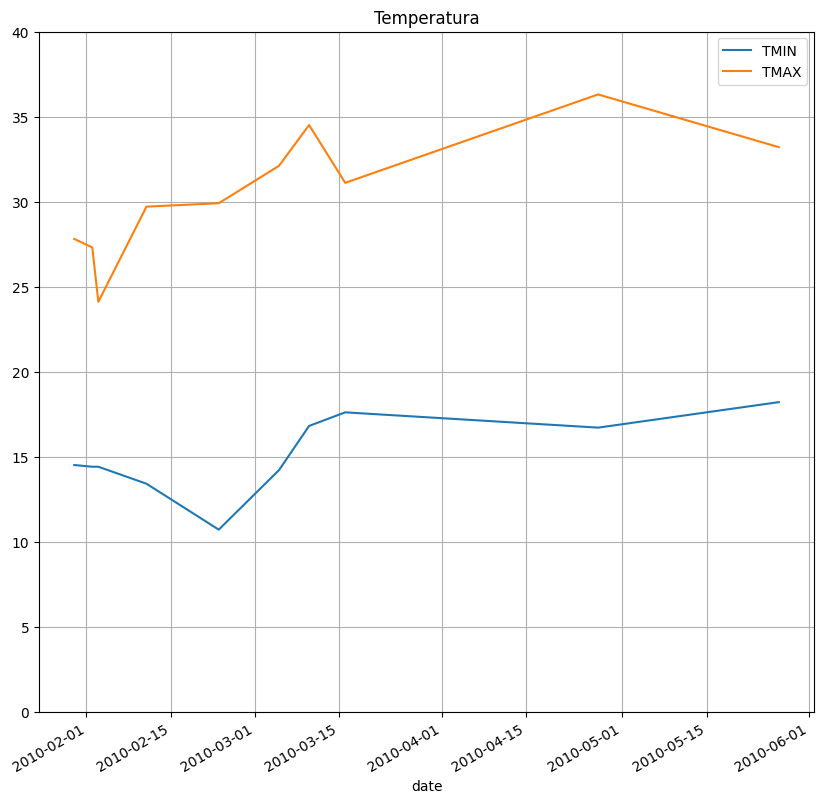

In [410]:
fig, ax = plt.subplots(figsize=((10,10)))
temp.plot(x='date', y='TMIN', kind='line', ax=ax)
temp.plot(x='date', y='TMAX', kind='line', ax=ax)
plt.title("Temperatura")
plt.ylim((0,40))
plt.grid()
plt.show()

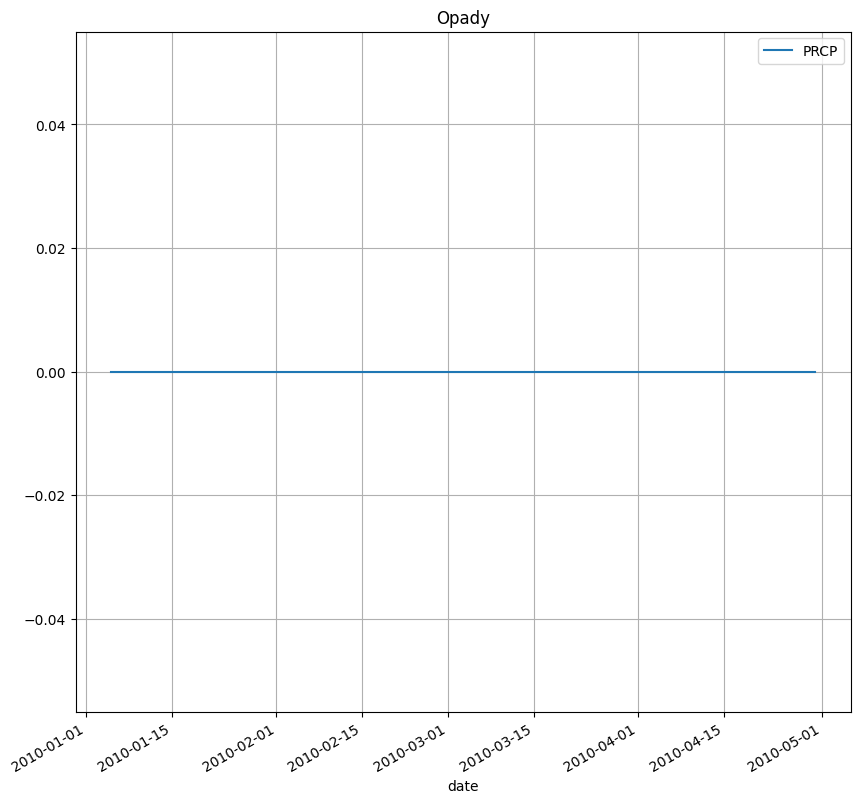

In [411]:
fig, ax = plt.subplots(figsize=((10,10)))
prcp.plot(x='date', y='PRCP', kind='line', ax=ax)
plt.grid()
plt.title("Opady")
plt.show()